In [1]:
!jupyter nbextension enable --py widgetsnbextension

Config option `kernel_spec_manager_class` not recognized by `EnableNBExtensionApp`.
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


NOTE FREQ: <br>
https://stackoverflow.com/questions/35339139/what-values-are-valid-in-pandas-freq-tags/35339226#35339226

In [48]:
import pandas as pd
from darts import TimeSeries
from cpl.data.processor_binance import BinanceProcessor
import numpy as np

# # Read a pandas DataFrame
# df = pd.read_csv('AirPassengers.csv', delimiter=",")

# # Create a TimeSeries, specifying the time and value columns
# series = TimeSeries.from_dataframe(df, 'Month', '#Passengers')

# # Set aside the last 36 months as a validation series
# train, val = series[:-36], series[-36:]

In [191]:
ticker_list = ["BTCUSDT"]
start_date = "2021-12-01"
end_date = "2021-12-05"
time_interval = "1m"
tech_inds = [] #['macd']

In [192]:
p = BinanceProcessor("binance")
df = p.download_data(ticker_list, start_date, end_date, time_interval)
df = p.add_technical_indicator(df, tech_inds)

Succesfully add technical indicators


In [193]:
# 10 min ema
#df['10mEWM'] = df['close'].ewm(span=10, adjust=False).mean()

In [194]:
df['time'] = pd.to_datetime(df['time'])

In [195]:
type(df['time'])

pandas.core.series.Series

In [196]:
df.head()

,time,open,high,low,close,volume,adj_close,tic
0,2021-12-01 00:00:00,56782.00,56817.36,56780.00,56782.00,17.52761,56782.00,BTCUSDT
1,2021-12-01 00:01:00,56782.00,56813.51,56740.00,56755.50,39.00328,56755.50,BTCUSDT
2,2021-12-01 00:02:00,56755.49,56755.50,56712.21,56720.84,23.64537,56720.84,BTCUSDT
3,2021-12-01 00:03:00,56720.83,56749.73,56712.22,56720.01,17.43134,56720.01,BTCUSDT
4,2021-12-01 00:04:00,56717.01,56727.62,56700.00,56714.45,19.49503,56714.45,BTCUSDT


In [200]:
#x_feats = ['open','high','low','close','volume','macd','10mEWM']
x_feats = 'close'

In [201]:
# Create a TimeSeries, specifying the time and value columns
#note freq: 
series = TimeSeries.from_dataframe(
    df, freq='T', time_col='time', value_cols=x_feats,
    fill_missing_dates=True, 
)

In [202]:
df.shape

(2999, 8)

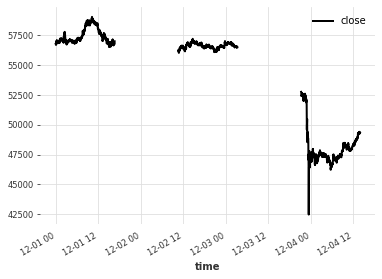

In [203]:
series.plot()

In [42]:
def train_val_split(series, pct=0.7):
    split = int(len(series)*0.7)
    train, val = series[:split], series[split:]
    assert len(train) + len(val) == len(series)
    return train, val

In [43]:
tr, val = train_val_split(series)

## VARIMA

In [11]:
from darts.models.forecasting.varima import VARIMA

Importing plotly failed. Interactive plots will not work.


## NBEATS Example from Darts

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from darts import TimeSeries
from darts.models import NBEATSModel
from darts.dataprocessing.transformers import Scaler, MissingValuesFiller
from darts.metrics import mape, r2_score
from darts.datasets import EnergyDataset

In [13]:
def display_forecast(pred_series, ts_transformed, forecast_type, start_date=None):
    plt.figure(figsize=(8, 5))
    if start_date:
        ts_transformed = ts_transformed.drop_before(start_date)
    ts_transformed.univariate_component(0).plot(label="actual")
    pred_series.plot(label=("historic " + forecast_type + " forecasts"))
    plt.title(
        "R2: {}".format(r2_score(ts_transformed.univariate_component(0), pred_series))
    )
    plt.legend()

Text(0.5, 1.0, 'Hourly generation hydro run-of-river and poundage')

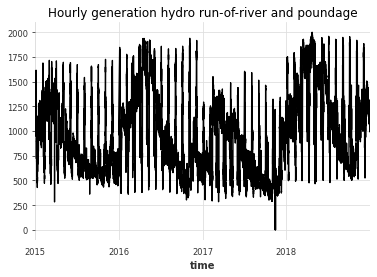

In [121]:
df = EnergyDataset().load().pd_dataframe()
df["generation hydro run-of-river and poundage"].plot()
plt.title("Hourly generation hydro run-of-river and poundage")

In [122]:
df.reset_index(inplace=True)

In [124]:
df

component,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2014-12-31 23:00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 00:00:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 01:00:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 02:00:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 03:00:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2018-12-31 18:00:00,297.0,0.0,0.0,7634.0,2628.0,178.0,0.0,0.0,0.0,...,277.0,0.0,3113.0,96.0,NaN,3253.0,30619.0,30653.0,68.85,77.02
35060,2018-12-31 19:00:00,296.0,0.0,0.0,7241.0,2566.0,174.0,0.0,0.0,0.0,...,280.0,0.0,3288.0,51.0,NaN,3353.0,29932.0,29735.0,68.40,76.16
35061,2018-12-31 20:00:00,292.0,0.0,0.0,7025.0,2422.0,168.0,0.0,0.0,0.0,...,286.0,0.0,3503.0,36.0,NaN,3404.0,27903.0,28071.0,66.88,74.30
35062,2018-12-31 21:00:00,293.0,0.0,0.0,6562.0,2293.0,163.0,0.0,0.0,0.0,...,287.0,0.0,3586.0,29.0,NaN,3273.0,25450.0,25801.0,63.93,69.89


In [106]:
df.head()

component,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2014-12-31 23:00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 00:00:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 01:00:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 02:00:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 03:00:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [16]:
#fill missing and scaler
filler = MissingValuesFiller()
scaler = Scaler()
series = scaler.fit_transform(
    filler.transform(
        TimeSeries.from_dataframe(
            df, "time", ["generation hydro run-of-river and poundage"]
        )
    )
).astype(np.float32)

In [28]:
train, val = series.split_after(pd.Timestamp("20170901"))

In [29]:
len(train)
# use less
train = train[:2000]; val = val[:300];
len(train)

2000

*Note*: N-BEATS is a univariate model architecture that offers two configurations: a generic one and a interpretable one. The generic architecture uses as little prior knowledge as possible, with no feature engineering, no scaling and no internal architectural components that may be considered time-series-specific. <br>
To start off, we use a model with the generic architecture of N-BEATS:

In [30]:
model_nbeats = NBEATSModel(
    input_chunk_length=30,
    output_chunk_length=7,
    generic_architecture=True,
    num_stacks=10,
    num_blocks=1,
    num_layers=4,
    layer_widths=512,
    n_epochs=10,
    nr_epochs_val_period=1,
    batch_size=800,
    model_name="nbeats_run",
)

In [31]:
model_nbeats.fit(train, val_series=val, verbose=True)

[2022-01-13 12:53:39,837] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 1964 samples.
[2022-01-13 12:53:39,837] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 1964 samples.
[2022-01-13 12:53:39,875] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 32-bits; casting model to float32.
[2022-01-13 12:53:39,875] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 32-bits; casting model to float32.


  0%|          | 0/10 [00:00<?, ?it/s]

Let's see the historical forecasts the model would have produced with an expanding training window, and a forecasting horizon of 7:

  0%|          | 0/2337 [00:00<?, ?it/s]

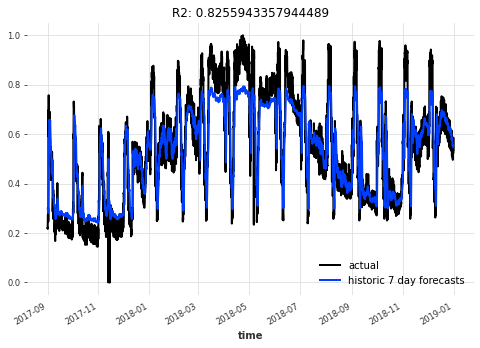

In [32]:
pred_series = model_nbeats.historical_forecasts(
    series,
    start=pd.Timestamp("20170901"),
    forecast_horizon=7,
    stride=5,
    retrain=False,
    verbose=True,
)
display_forecast(pred_series, series, "7 day", start_date=pd.Timestamp("20170901"))

Okay, lets try with crypto now

## NBEATS

Note: darts supports multivariate series by flattening the model inputs to a 1-D series and reshaping the outputs to a tensor of appropriate dimensions. Furthermore, it also supports producing probabilistic forecasts

- input_chunk_length: this is the "lookback window" of the model - i.e., how many time steps of history the neural network takes as input to produce its output in a forward pass.
- output_chunk_length: this is the "forward window" of the model - i.e., how many time steps of future values the neural network outputs in a forward pass.

In [80]:
from darts.dataprocessing.transformers import Scaler

In [47]:
univar_series = TimeSeries.from_dataframe(df, freq='M', time_col='time', value_cols='close')

[2022-01-13 13:02:01,097] ERROR | darts.timeseries | ValueError: Could not correctly fill missing dates with the observed/passed frequency freq='M'. Not all input time stamps contained in the newly created TimeSeries. For more information about frequency aliases, read https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases


ValueError: Could not correctly fill missing dates with the observed/passed frequency freq='M'. Not all input time stamps contained in the newly created TimeSeries. For more information about frequency aliases, read https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

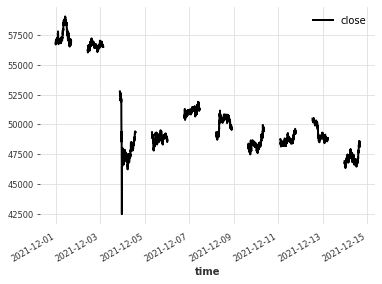

In [46]:
univar_series.plot()

In [35]:
uni_tr.plot()

NameError: name 'uni_tr' is not defined

In [83]:
scaler = Scaler()
tr_scaled = scaler.fit_transform([tr])

In [85]:
tr_scaled.plot()

AttributeError: 'list' object has no attribute 'plot'

In [78]:
from darts.models import NBEATSModel

#

model = NBEATSModel(input_chunk_length=24,
                    output_chunk_length=12,
                    random_state=42)

### Exponential Smoothing (non-global forecasting model)

In [69]:
df.time.freq = 'T'

In [73]:
univar_series = TimeSeries.from_dataframe(df, freq='1T', time_col='time', value_cols='close')

In [102]:
uni_tr, uni_val = train_val_split(univar_series)

In [105]:
from darts.models import ExponentialSmoothing
#https://giters.com/unit8co/darts/issues/552 Super useful
from darts.utils.utils import SeasonalityMode

model = ExponentialSmoothing(seasonal=SeasonalityMode.NONE)
model.fit(uni_tr)
pred = model.predict(5)
#prediction = model.predict(len(uni_val), num_samples=1000)

/home/m73/miniconda3/envs/ai4f-37/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


NameError: name 'plt' is not defined

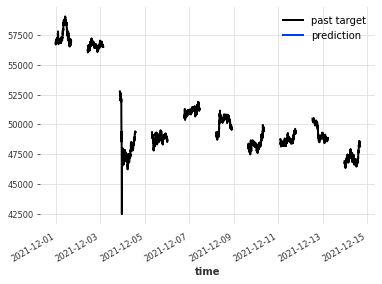

In [106]:
univar_series.plot(label='past target')
pred.plot(label='prediction')
plt.show()

In [108]:
from darts import TimeSeries
from darts.models import ExponentialSmoothing
from darts.utils import timeseries_generation as tsg
from darts.utils.utils import SeasonalityMode
from matplotlib import pyplot as plt


series = tsg.datetime_attribute_timeseries(length=10, freq='T')
series.to_csv('5_minute_data.csv')

series_from_csv = TimeSeries.from_csv('5_minute_data.csv', time_col='time')

model = ExponentialSmoothing(seasonal=SeasonalityMode.NONE)
model.fit(series_from_csv)

pred = model.predict(5)

series_from_csv.plot(label='past target')
pred.plot(label='prediction')
plt.show()

TypeError: datetime_attribute_timeseries() got an unexpected keyword argument 'length'